# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [165]:
# Import the appropriate libraries
import pandas as pd
import numpy as np



In [166]:
# Create two new dataframes
North_call_center_df=pd.read_csv("C:/Users/Buddi/Documents/GitHub/call-center-cleanup-assignment/NorthCallCenter.csv")
North_call_center_df.head()


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [167]:
South_call_center_df=pd.read_csv("C:/Users/Buddi/Documents/GitHub/call-center-cleanup-assignment/SouthCallCenter.csv")
South_call_center_df.head()


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [168]:
# Put your EDA code here
# How many reps are in each branch?

North_call_center_df['Rep ID'].drop_duplicates().count()

9

In [169]:
South_call_center_df['Rep ID'].drop_duplicates().count()

11

In [170]:
# What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?

North_call_center_df[["Busy Minutes","Not Ready Minutes","Incoming Wait Time","During Call Wait Time"]].mean()

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

In [171]:
South_call_center_df[["Busy Minutes","Not Ready Minutes","Incoming Wait Time","During Call Wait Time"]].mean()

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

In [172]:
# What is the number of calls taken for each time block?

North_call_center_df['Time Block'].value_counts()


12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

In [173]:
South_call_center_df['Time Block'].value_counts()

12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64

### EDA Results

Make note of your results here!

1. How many reps are in each branch?

   For North branch there are 9 reps and 11 reps for south branch.

2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?

   North branch:

     Busy Minutes             9.987755 ,
     Not Ready Minutes        1.914286 ,
     Incoming Wait Time       3.048780 ,
     During Call Wait Time    2.967347 ,

    South branch:

      Busy Minutes             10.054140 ,
      Not Ready Minutes         1.910828 ,
      Incoming Wait Time        3.000000 ,
      During Call Wait Time     3.076433 ,


3. What is the number of calls taken for each time block?

     North branch:

       12:00 PM      45 ,
       10:00 AM      43 ,
        2:00 PM      35 ,
        3:00 PM      30 ,
        4:00 PM      28 ,
       11:00 AM      25 ,
        1:00 PM      17 ,
        5:00 PM      17 ,
        9:00 AM       5 ,

   South branch:

        12:00 PM      75 ,
        10:00 AM      56 ,
         3:00 PM      43 ,
        11:00 AM      31 ,
         2:00 PM      30 ,
         5:00 PM      26 ,
         4:00 PM      25 ,
         1:00 PM      23 ,
         9:00 AM      5 ,




## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [174]:
# Clean your data here
# Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?

North_call_center_df[["Incoming Wait Time","Incoming or Outgoing"]].value_counts(dropna = False)


Incoming Wait Time  Incoming or Outgoing
NaN                 Outgoing                163
4.0                 Incoming                 20
1.0                 Incoming                 17
5.0                 Incoming                 17
2.0                 Incoming                 16
3.0                 Incoming                 12
dtype: int64

In [175]:
South_call_center_df[["Incoming Wait Time","Incoming or Outgoing"]].value_counts(dropna = False)

Incoming Wait Time  Incoming or Outgoing
NaN                 Outgoing                188
4.0                 Incoming                 30
3.0                 Incoming                 29
2.0                 Incoming                 28
1.0                 Incoming                 20
5.0                 Incoming                 19
dtype: int64

In [176]:
#  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue? 

North_call_center_df['Sale'].mask( North_call_center_df['Sale'] =='YES ','YES', inplace=True )

In [177]:
North_call_center_df["Sale"].value_counts() 

NO     234
YES     11
Name: Sale, dtype: int64

In [178]:
# # Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

#   There is no unnecessary data i.e, there are no duplicates or unnecessary columns to eliminate.
#    If there are any duplicates or unnecessary columns i will drop them.

### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?

   Yes.The "Incoming wait time" is null for all "Outgoing" values from "Incoming or Outgoing" column.

2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

    I will use the mask() to replace " YES" with "YES" which should rectify the problem as shown below:

   Syntax: North_call_center_df['Sale'].mask( North_call_center_df['Sale'] =='YES ','YES', inplace=True )
   
3. Are there duplicates in the two data sets? If there are, how did you handle them?

   There are no duplicates on both datasets.If there are any duplicates i will remove them and keep only one record.

4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

   There is no unnecessary data i.e, there are no duplicates or unnecessary columns to eliminate.If there are any duplicates or unnecessary columns i will drop them.

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [179]:
# Manipulate data here

# combine the two datasets together to create a third dataframe called df
df= pd.concat([North_call_center_df, South_call_center_df], ignore_index=True)
df.head()
#df.shape


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [180]:
# Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

df_groupby_rep=df.groupby(by=["Rep ID"]).sum().sort_values(by=['Calls'],ascending=False)
df_groupby_rep.head()



,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,
Brent,4840,0,1,362,71,17.0,117,37
Eric,5039,0,0,361,54,47.0,112,35
Randy,4576,3,1,320,66,47.0,98,33
Sandy,4694,1,0,325,60,34.0,100,32
Helga,5236,0,2,292,58,36.0,95,31


In [181]:
# The average call abandonment rate is a KPI(Key performance indicator) when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

# Average percentage of abandoned calls for North call center

North_call_center_var=(North_call_center_df['Abandoned'].sum()/len(North_call_center_df['Abandoned']))*100
North_call_center_var

2.857142857142857

In [182]:
# Average percentage of abandoned calls for South call center

South_call_center_var=(South_call_center_df['Abandoned'].sum()/len(South_call_center_df['Abandoned']))*100
South_call_center_var

1.2738853503184715

In [183]:
# Average percentage of abandoned calls for whole company

df_var=(df['Abandoned'].sum()/len(df['Abandoned']))*100
df_var
# Answer : For South branch the average call abandoned rate is 1.27% and for whole company the average call abandoned rate is 1.96% which is out of optimal range.

1.9677996422182469

In [184]:
# Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?

# The percentage of calls answered within 2 seconds for North branch
#To find out the percentage of calls answered within 2 seconds for North branch we need to get the 
#number of calls answered lessthan 2 seconds divided by total number of calls multiplied with 100.
North_call_center_var1 = North_call_center_df[North_call_center_df["Incoming Wait Time"] <= 2.0]
(North_call_center_var1['Calls'].sum()/North_call_center_df['Calls'].sum())*100


13.46938775510204

In [185]:
# The percentage of calls answered within 2 seconds for South branch
South_call_center_var1 = South_call_center_df[South_call_center_df["Incoming Wait Time"] <= 2.0]
(South_call_center_var1['Calls'].sum()/South_call_center_df['Calls'].sum())*100

15.286624203821656

In [186]:
# The percentage of calls answered within 2 seconds for whole company
df_var1 = df[df["Incoming Wait Time"] <= 2.0]
(df_var1['Calls'].sum()/df['Calls'].sum())*100

# The percentage of calls answered within 2 seconds for North branch is 13.46%,South branch is 15.28% and for whole company it si 14.49%

14.490161001788909

In [187]:
# For each branch and the entire company, what is the average speed of answer?
# The average speed of answer for north branch
# North_call_center_var_2=(North_call_center_df['Incoming Wait Time'].sum()/North_call_center_df['Calls'].sum())
# North_call_center_var_2

North_call_center_var_2=North_call_center_df['Incoming Wait Time'].mean()
North_call_center_var_2

3.048780487804878

In [188]:
# The average speed of answer for South branch

# South_call_center_var_2=(South_call_center_df['Incoming Wait Time'].sum()/South_call_center_df['Calls'].sum())
# South_call_center_var_2

South_call_center_var_2=South_call_center_df['Incoming Wait Time'].mean()
South_call_center_var_2

3.0

In [189]:
# The average speed of answer for whole company

# df_var_2=df['Incoming Wait Time'].sum()/df['Calls'].sum()
# df_var_2

df_var_2=df['Incoming Wait Time'].mean()
df_var_2

# The average speed of answer for North branch is 3.048 seconds,South branch is 3 seconds and whole company is 3.019 seconds

3.019230769230769

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
   
   A rep "Brent" has "37" calls which is highest.
   
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
    
    For South branch the average call abandoned rate is 1.27% and for whole company the average call abandoned rate is 1.96% which is out of optimal range.
   
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
     
     The percentage of calls answered within 2 seconds for North branch is 13.46%,South branch is 15.28% and for whole company it is 14.49%
   
4. For each branch and the entire company, what is the average speed of answer?

      The average speed of answer for North branch is 1.02 seconds,South branch is 1.20 seconds and whole company is 1.12 seconds.

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

In [190]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
    
abandonment_rates

{'A': 0.041666666666666664,
 'B': 0.020134228187919462,
 'C': 0.007246376811594203,
 'D': 0.017045454545454544}

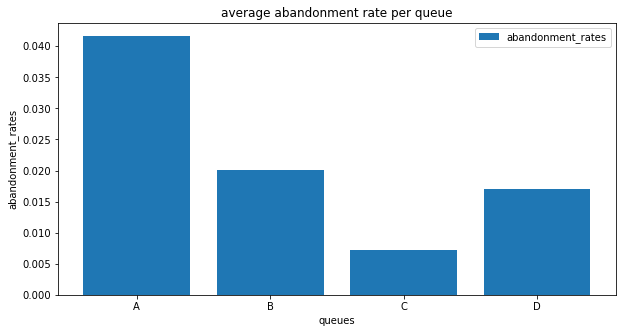

In [191]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 5))
plt.bar(range(len(abandonment_rates)), list(abandonment_rates.values()), align='center',label= 'abandonment_rates' )
plt.xticks(range(len(abandonment_rates)), list(abandonment_rates.keys()))
plt.xlabel("queues")
plt.ylabel("abandonment_rates")
plt.title("average abandonment rate per queue")
plt.legend()
plt.show()

In [192]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep
#What is the service level and average speed of answer per each rep?

north_plt = North_call_center_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = North_call_center_df[North_call_center_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table



# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = North_call_center_df[North_call_center_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
service_level = service_level.rename(columns={'Calls_x': 'Quick_calls', 'Calls_y': 'total_calls'})
# To find out average speed of answer per each rep, we need to total wait time/total calls by each rep
waittimes = North_call_center_df[["Rep ID", "Incoming Wait Time"]]
waitTime_stats = waittimes.groupby(["Rep ID"]).sum() 
waitTime_stats = waitTime_stats.rename(columns={'Incoming Wait Time': 'Total_wait_time'})
service_level_and_avg_speed = pd.merge(service_level, waitTime_stats, on="Rep ID")
service_level_and_avg_speed['avg_speed'] = service_level_and_avg_speed['Total_wait_time']/service_level_and_avg_speed['total_calls']
service_level_and_avg_speed

,Quick_calls,total_calls,Service Level %,Total_wait_time,avg_speed
Rep ID,,,,,
Amanda,3,5,60.000000,12.0,2.400000
Andy,3,10,30.000000,36.0,3.600000
Brent,6,8,75.000000,17.0,2.125000
Cam,5,11,45.454545,32.0,2.909091
Duke,6,14,42.857143,39.0,2.785714
Joe,2,10,20.000000,36.0,3.600000
Lilly,4,12,33.333333,37.0,3.083333
Todd,2,6,33.333333,21.0,3.500000
Xander,2,6,33.333333,20.0,3.333333


<Figure size 504x216 with 0 Axes>

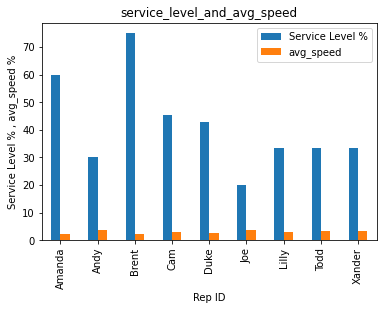

In [193]:
import pandas as pd
import matplotlib.pyplot as plt


# plot a line graph

fig = plt.figure(figsize = (7, 3))
service_level_and_avg_speed[['Service Level %' , 'avg_speed']].plot(kind='bar')

plt.ylabel("Service Level % , avg_speed %")
plt.xlabel("Rep ID")
plt.title("service_level_and_avg_speed")
plt.show()



In [194]:

# This calculation is to analyze the data

South_plt = South_call_center_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls_South = South_call_center_df[South_call_center_df["Incoming Wait Time"] <= 2.0]
quick_reps_South = quick_calls_South[["Rep ID", "Calls"]]
quick_stats_South = quick_reps_South.groupby(["Rep ID"]).sum()  # Final Table



# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in_South = South_call_center_df[South_call_center_df["Incoming or Outgoing"] == "Incoming"]
rep_calls_South = total_calls_in_South[["Rep ID", "Calls"]]     
total_stats_South = rep_calls_South.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level_South = pd.merge(quick_stats_South, total_stats_South, on="Rep ID")

# Create Percentage Column in Table 3
service_level_South["Service Level %"] = service_level_South["Calls_x"]/service_level_South["Calls_y"] * 100
service_level_South = service_level_South.rename(columns={'Calls_x': 'Quick_calls', 'Calls_y': 'total_calls'})
# To find out average speed of answer per each rep, we need to total wait time/total calls by each rep
waittimes_South = South_call_center_df[["Rep ID", "Incoming Wait Time"]]
waitTime_stats_South = waittimes_South.groupby(["Rep ID"]).sum() 
waitTime_stats_South = waitTime_stats_South.rename(columns={'Incoming Wait Time': 'Total_wait_time'})
service_level_and_avg_speed_South = pd.merge(service_level_South, waitTime_stats_South, on="Rep ID")
service_level_and_avg_speed_South['avg_speed'] = service_level_and_avg_speed_South['Total_wait_time']/service_level_and_avg_speed_South['total_calls']
service_level_and_avg_speed_South

,Quick_calls,total_calls,Service Level %,Total_wait_time,avg_speed
Rep ID,,,,,
Alice,3,6,50.000000,15.0,2.500000
Eric,10,18,55.555556,47.0,2.611111
George,4,13,30.769231,41.0,3.153846
Helga,3,11,27.272727,36.0,3.272727
Josh,2,9,22.222222,31.0,3.444444
Karl,3,9,33.333333,26.0,2.888889
Kate,3,11,27.272727,37.0,3.363636
Randy,7,16,43.750000,47.0,2.937500
Sandy,7,13,53.846154,34.0,2.615385


In [195]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
#For each type of call purpose, how many calls are outgoing vs. incoming?
purpose_counts = df[["Call Purpose", "Incoming or Outgoing"]].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()
print(complaints,sales_support,product_support)

{'Incoming': 51} {'Outgoing': 123, 'Incoming': 75} {'Outgoing': 228, 'Incoming': 82}


C:\Users\Buddi\AppData\Local\Temp/ipykernel_15880/131868572.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


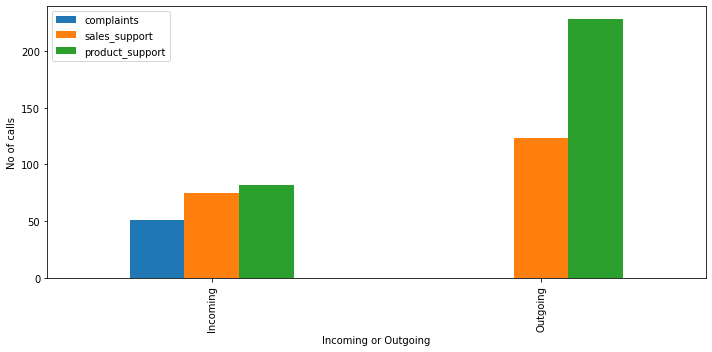

In [196]:
import matplotlib.pyplot as plt
import pandas as pd


df_plot = pd.DataFrame([complaints,sales_support,product_support], index=['complaints','sales_support','product_support']).transpose()

fig, ax= plt.subplots(1,1, figsize=(10,5))

df_plot.plot.bar(ax=ax)
ax.set_xlabel('Incoming or Outgoing')
ax.set_ylabel('No of calls')

fig.tight_layout()
fig.show()

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

    The North branch is operating more efficiently because out of three KPI parameters North branch satisfies two parameters such as average abandonment rate for North branch is 2.85% which falls under optimal range of 2-5% and speed of answer is 1.02 seconds which is less when compared to South branch. 


2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

   I think South branch would benefit from extra help because for south branch there are 11 Reps ,wait time is 378 seconds and answer only 82 calls while North branch has 9 Reps ,wait time is 250 seconds and answer 126 calls.
   

3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?
   
   I find every column helpful for analysis.So,no need of extra information.



## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

<AxesSubplot:xlabel='Time Block'>

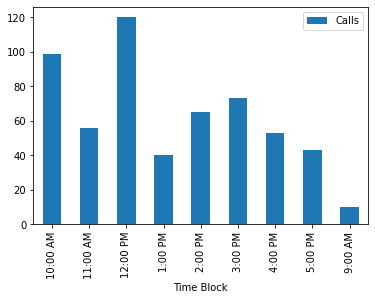

In [197]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:
#call_times.groupby(['Time Block']).sum().plot.bar()
call_times.groupby(by = "Time Block").sum().plot(kind = "bar")
# Use groupby and get_group to select which call purpose to plot:


In [198]:
call_grouped = call_times.groupby(['Time Block', 'Incoming or Outgoing']).sum()

In [199]:
call_grouped.index

MultiIndex([('10:00 AM', 'Incoming'),
            ('10:00 AM', 'Outgoing'),
            ('11:00 AM', 'Incoming'),
            ('11:00 AM', 'Outgoing'),
            ('12:00 PM', 'Incoming'),
            ('12:00 PM', 'Outgoing'),
            ( '1:00 PM', 'Incoming'),
            ( '1:00 PM', 'Outgoing'),
            ( '2:00 PM', 'Incoming'),
            ( '2:00 PM', 'Outgoing'),
            ( '3:00 PM', 'Incoming'),
            ( '3:00 PM', 'Outgoing'),
            ( '4:00 PM', 'Incoming'),
            ( '4:00 PM', 'Outgoing'),
            ( '5:00 PM', 'Incoming'),
            ( '5:00 PM', 'Outgoing'),
            ( '9:00 AM', 'Incoming'),
            ( '9:00 AM', 'Outgoing')],
           names=['Time Block', 'Incoming or Outgoing'])

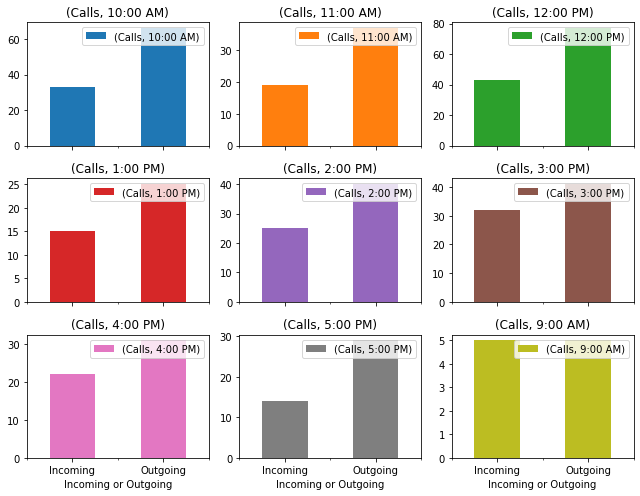

In [200]:
ax = call_grouped.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(9, 7), layout=(3, 3))
plt.tight_layout()